In [1]:
import sqlite3
import pandas as pd

df = pd.read_csv('cleaned_survey_data.csv')

# Display the first few rows of the data
df.head()
# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


65422

In [ ]:
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)

   ResponseId        MainBranch        Age    Employment  \
0           1         Developer  Under 18   Employed, FT   
1           2         Developer     35-44   Employed, FT   
2           3         Developer     45-54   Employed, FT   
3           4  Learning to code     18-24    Student, FT   
4           5         Developer     18-24    Student, FT   

                             RemoteWork   Check  \
0                                Remote  Apples   
1                                Remote  Apples   
2                                Remote  Apples   
3  Hybrid (some remote, some in-person)  Apples   
4  Hybrid (some remote, some in-person)  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3  Hobby;Contribute to open-source projects;Other...   
4  Hobby;Contribute to open-source projects;Other...

In [ ]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()

,COUNT(*)
0,65422


In [ ]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)

,Table_Name
0,main2
1,main


In [ ]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24,14095
1,25-34,23908
2,35-44,14936
3,45-54,6248
4,55-64,2574
5,65 years or older,772
6,Prefer not to say,321
7,Under 18,2568


In [ ]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" REAL,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


       Salary_imputed
0            150000.0
1             87579.5
2             95541.0
3             74874.0
4             65514.0
...               ...
65417         65000.0
65418         65000.0
65419         65000.0
65420         49407.0
65421         65000.0

[65422 rows x 1 columns]


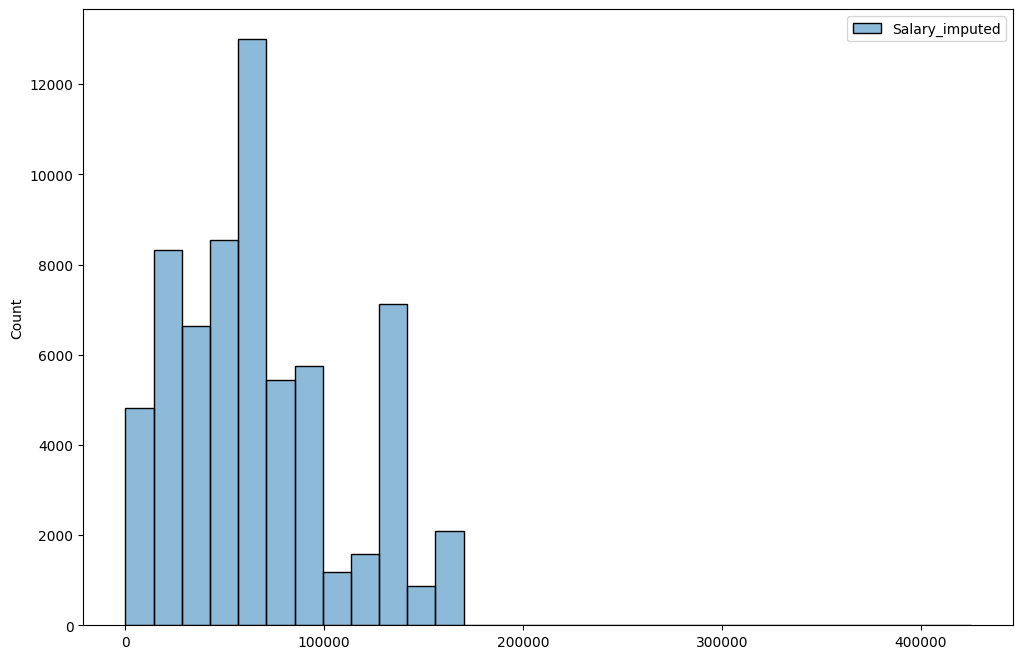

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
query= """
SELECT salary_imputed from main
"""
df=pd.read_sql_query(query, conn)
print(df)

plt.figure(figsize=(12,8))
sns.histplot(data=df, bins=30)
plt.show()

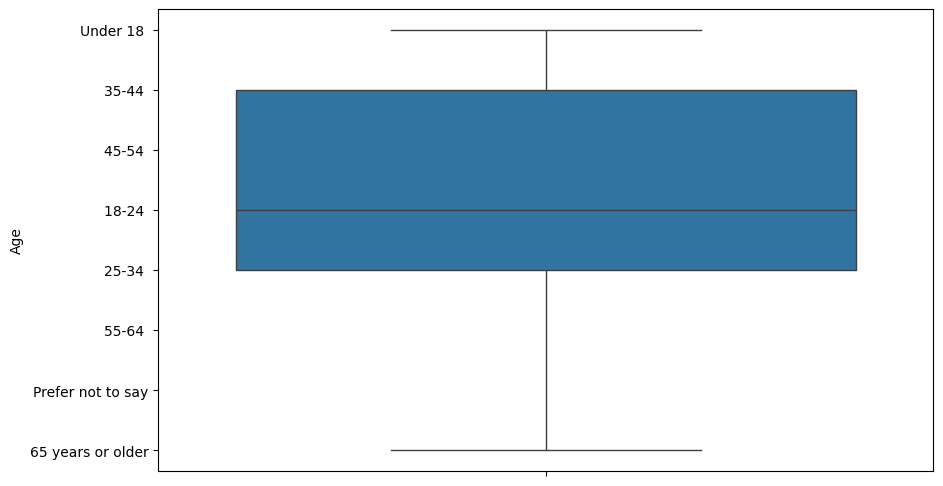

In [ ]:
query = """
select age from main
"""
df=pd.read_sql_query(query, conn)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(data=df,  y='Age')
plt.show()

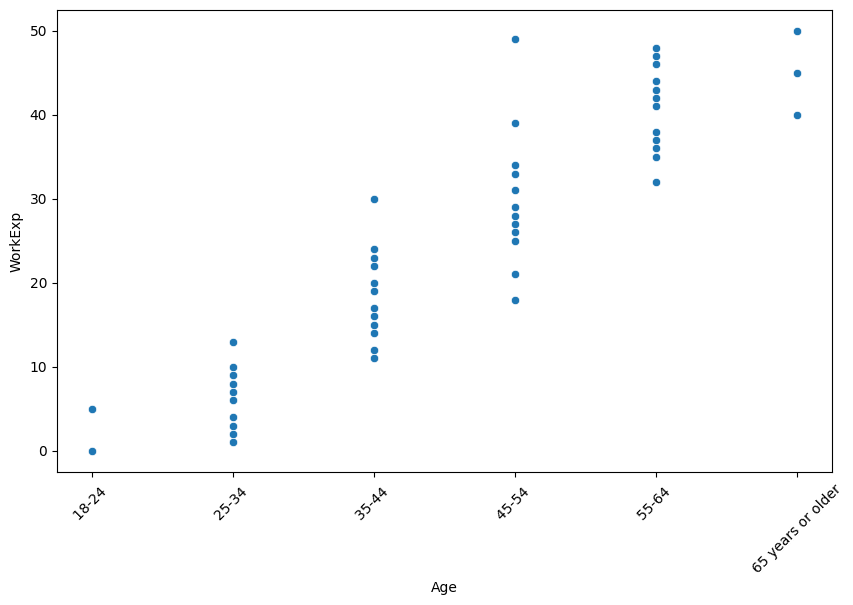

In [ ]:
query = """
select Age, WorkExp from main
group by workexp
"""
df=pd.read_sql_query(query, conn)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(data=df,  x='Age', y='WorkExp')
plt.xticks(rotation=45)
plt.show()

In [ ]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)

,Table_Name
0,main2
1,main


In [ ]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age desc
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                 Age  count
0          Under 18    2568
1  Prefer not to say    321
2  65 years or older    772
3             55-64    2574
4             45-54    6248
5             35-44   14936
6             25-34   23908
7             18-24   14095


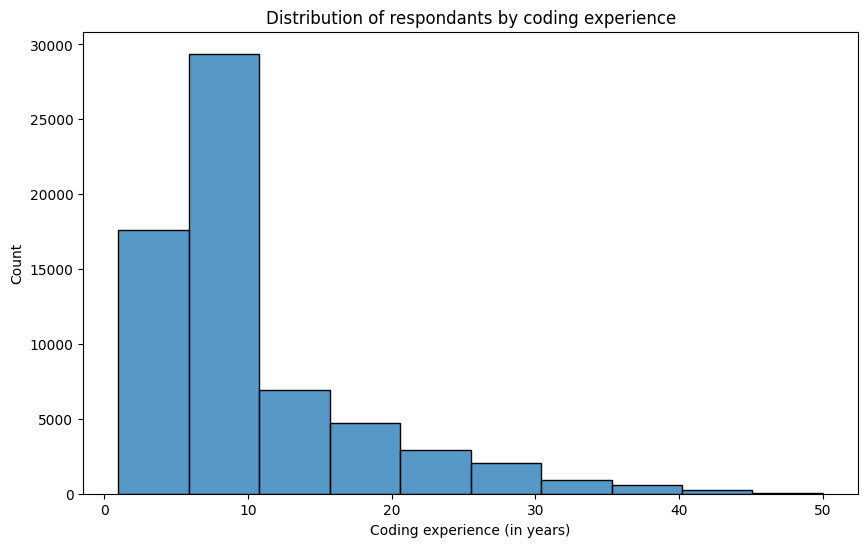

In [ ]:
query="""
select YearsCodePro_num from main
"""
df=pd.read_sql_query(query, conn)

plt.figure(figsize=(10,6))
sns.histplot(data=df, x='YearsCodePro_num', bins=10)
plt.xlabel('Coding experience (in years)')
plt.title('Distribution of respondants by coding experience')
plt.show()

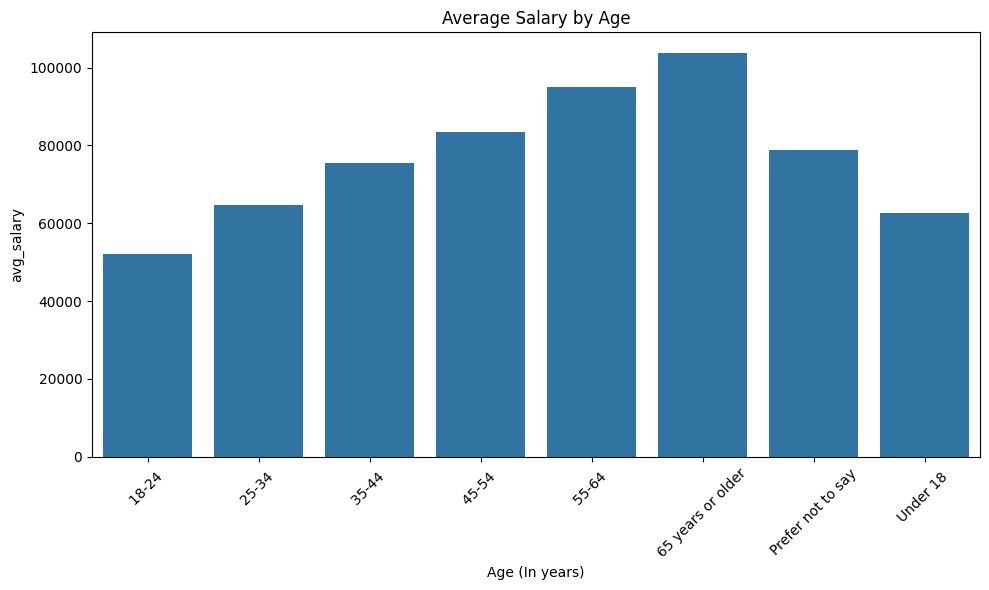

In [ ]:
query="""
select Age, round(avg(salary_imputed), 0) as avg_salary from main
group by Age
"""
df_avg=pd.read_sql_query(query, conn)
plt.figure(figsize=(10,6))
sns.barplot(data=df_avg, y='avg_salary', x='Age')
plt.ylim(bottom=0)
plt.xlabel('Age (In years)')
plt.title('Average Salary by Age')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

                 Age  Time_spent
0             18-24         29.0
1             25-34         27.0
2             35-44         25.0
3             45-54         25.0
4             55-64         24.0
5  65 years or older        21.0
6  Prefer not to say        22.0
7          Under 18         27.0


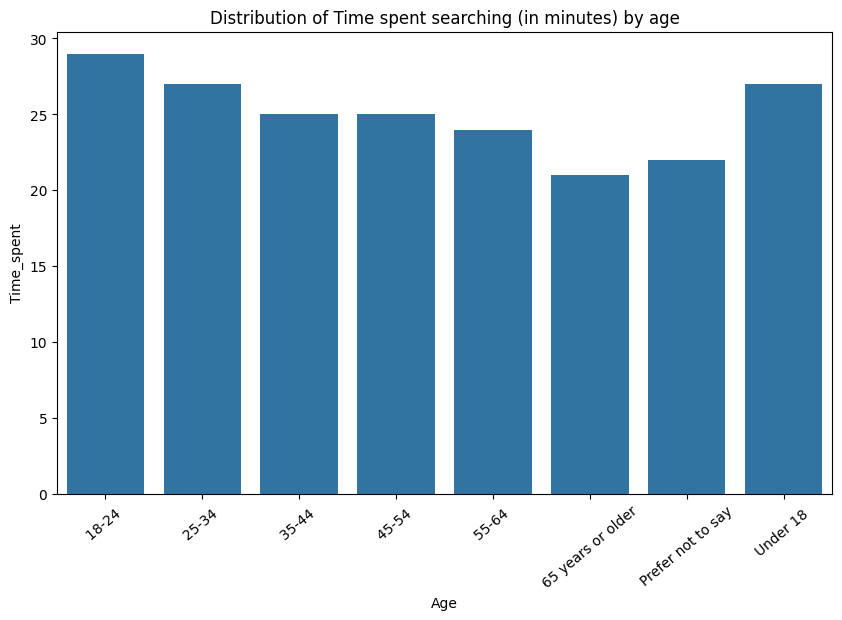

In [ ]:
query="""
select age, round(avg(timesearching), 0) as Time_spent from main
group by age
"""
df_timesearching=pd.read_sql_query(query, conn)
print(df_timesearching)
plt.figure(figsize=(10,6))
sns.barplot(data=df_timesearching, x='Age', y='Time_spent')
plt.xticks(rotation=40)
plt.title("Distribution of Time spent searching (in minutes) by age")
plt.show()

In [ ]:
query="""
select databasewanttoworkwith, count(databasewanttoworkwith) as Respondants from main
group by databasewanttoworkwith
order by respondants desc limit 5
"""
df=pd.read_sql_query(query, conn)
df

,DatabaseWantToWorkWith,Respondants
0,No Response,22870
1,PostgreSQL,3738
2,PostgreSQL;SQLite,1533
3,SQLite,1476
4,Microsoft SQL Server,1431


In [ ]:
conn.close()

In [ ]:
import sqlite3
import pandas as pd

df = pd.read_csv('database_exploded.csv')

# Display the first few rows of the data
df.head()
# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main2', conn, if_exists='replace', index=False)


127394

  DatabaseWantToWorkWith  respondants
0             PostgreSQL        24001
1                 SQLite        13487
2                  MySQL        12266
3                MongoDB        10979
4                  Redis        10846


C:\Users\Administrator\AppData\Local\Temp\ipykernel_17916\1713798475.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df, x='DatabaseWantToWorkWith', y='respondants', palette='viridis')


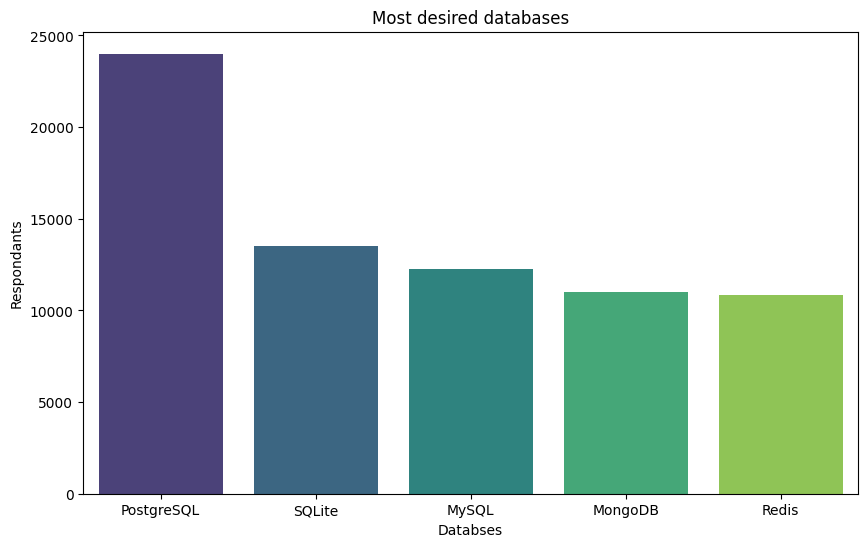

In [ ]:
query="""
select databasewanttoworkwith, count(databasewanttoworkwith) as respondants from main2
group by databasewanttoworkwith
order by respondants desc limit 5
"""
df=pd.read_sql_query(query, conn)
print(df)
plt.figure(figsize=(10,6))
sns.barplot(df, x='DatabaseWantToWorkWith', y='respondants', palette='viridis')
plt.title('Most desired databases')
plt.xlabel('Databses')
plt.ylabel('Respondants')
plt.show()

conn.close()

In [ ]:
import sqlite3
import pandas as pd

df=pd.read_csv('cleaned_survey_data.csv')
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)

65422

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17916\2414459666.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df, x='RemoteWork', y='Count', palette='viridis')


Text(0.5, 0, 'Mode of work')

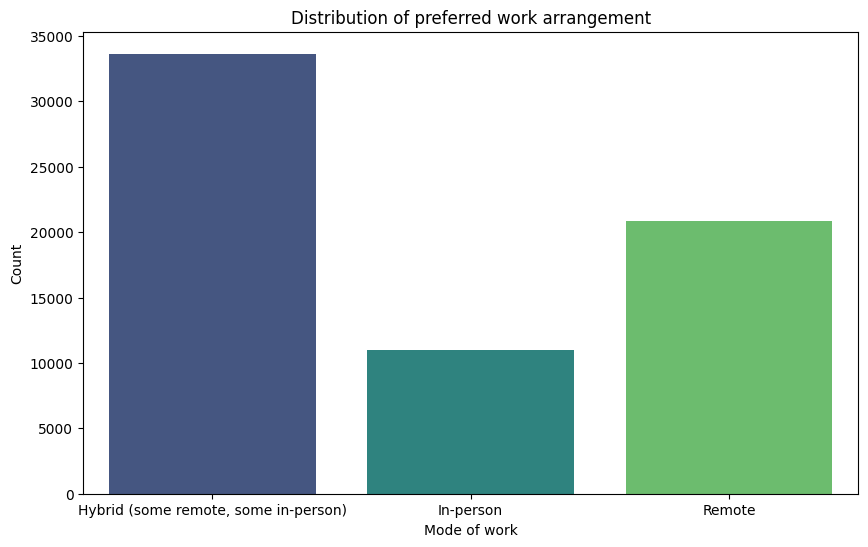

In [ ]:
query="""
select RemoteWork, count(remotework) as Count from main
group by remotework
"""
df=pd.read_sql_query(query, conn)
df

plt.figure(figsize=(10,6))
sns.barplot(df, x='RemoteWork', y='Count', palette='viridis')
plt.title('Distribution of preferred work arrangement')
plt.xlabel('Mode of work')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17916\653917378.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df, x='Age', y='Salary_imputed', palette='tab10')


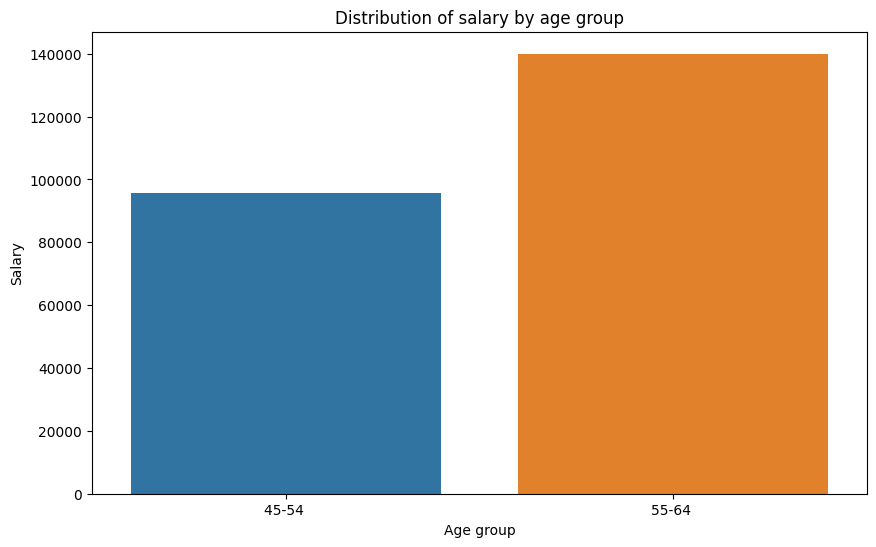

In [ ]:
query="""
select age, salary_imputed from main
where age in ('45-54 ', '55-64 ')
group by age
"""
df=pd.read_sql_query(query, conn)
df
plt.figure(figsize=(10,6))
sns.barplot(df, x='Age', y='Salary_imputed', palette='tab10')
plt.xlabel('Age group')
plt.ylabel('Salary')
plt.title('Distribution of salary by age group')
plt.show()

In [ ]:
conn.close()

In [ ]:
df = pd.read_csv('cleaned_survey_data.csv')

# SQLite database connection
conn = sqlite3.connect('survey-data.sqlite')

# Writing the dataframe to the database
df.to_sql('main', conn, if_exists='replace', index=False)

65422

             Age  Salary_imputed
0         18-24              1.0
1         18-24              6.0
2         18-24             14.0
3         18-24             14.0
4         18-24             14.0
...          ...             ...
65417  Under 18         158424.0
65418  Under 18         160000.0
65419  Under 18         214355.0
65420  Under 18         214355.0
65421  Under 18         214355.0

[65422 rows x 2 columns]


C:\Users\Administrator\AppData\Local\Temp\ipykernel_17916\3619161083.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_comp, x='Age', y='Salary_imputed', palette='Set2')


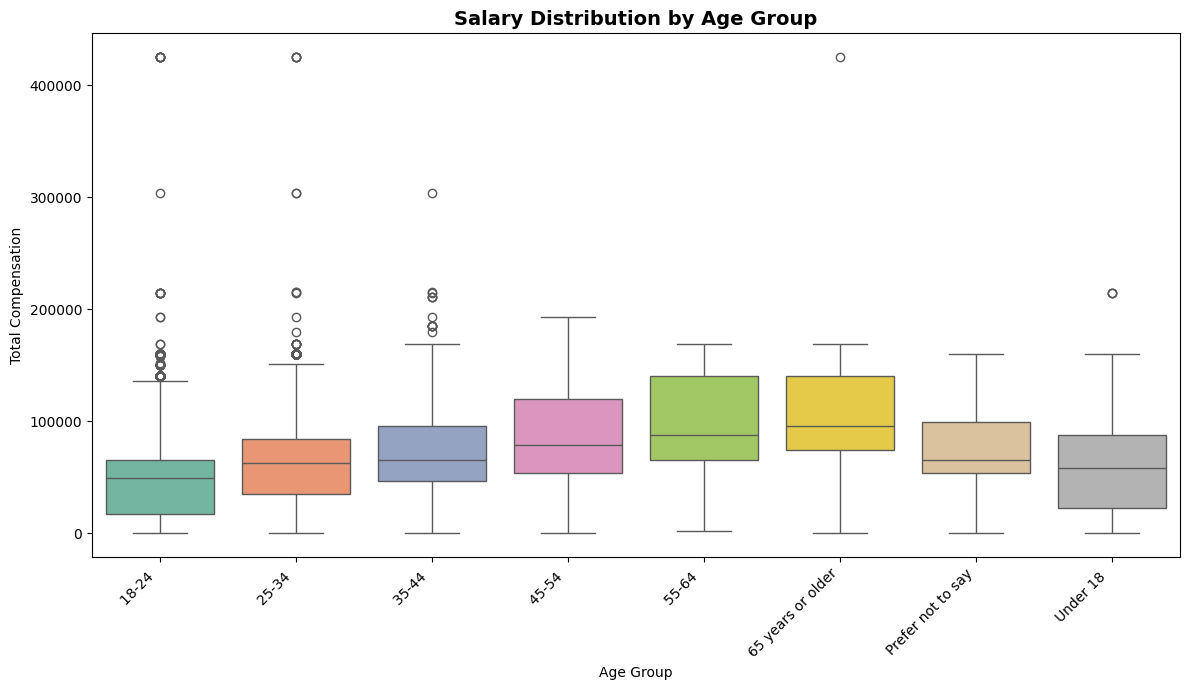

In [ ]:
import matplotlib.ticker as ticker
query = """
SELECT Age, Salary_imputed
FROM main 
ORDER BY Age, Salary_imputed
"""
df_comp = pd.read_sql_query(query, conn)
print(df_comp)
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_comp, x='Age', y='Salary_imputed', palette='Set2')
plt.title('Salary Distribution by Age Group', fontsize=14, fontweight='bold')
plt.xlabel('Age Group')
plt.ylabel('Total Compensation')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.tight_layout()
plt.show()


       JobSat  Salary_imputed
0         5.0             1.0
1         7.0             1.0
2         7.0             1.0
3         3.0             3.0
4         7.0             3.0
...       ...             ...
65417     9.0        425272.0
65418     9.0        425272.0
65419     9.0        425272.0
65420     9.0        425272.0
65421    10.0        425272.0

[65422 rows x 2 columns]


C:\Users\Administrator\AppData\Local\Temp\ipykernel_17916\2699921216.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_jobsat, x='JobSat', y='Salary_imputed', palette='viridis')


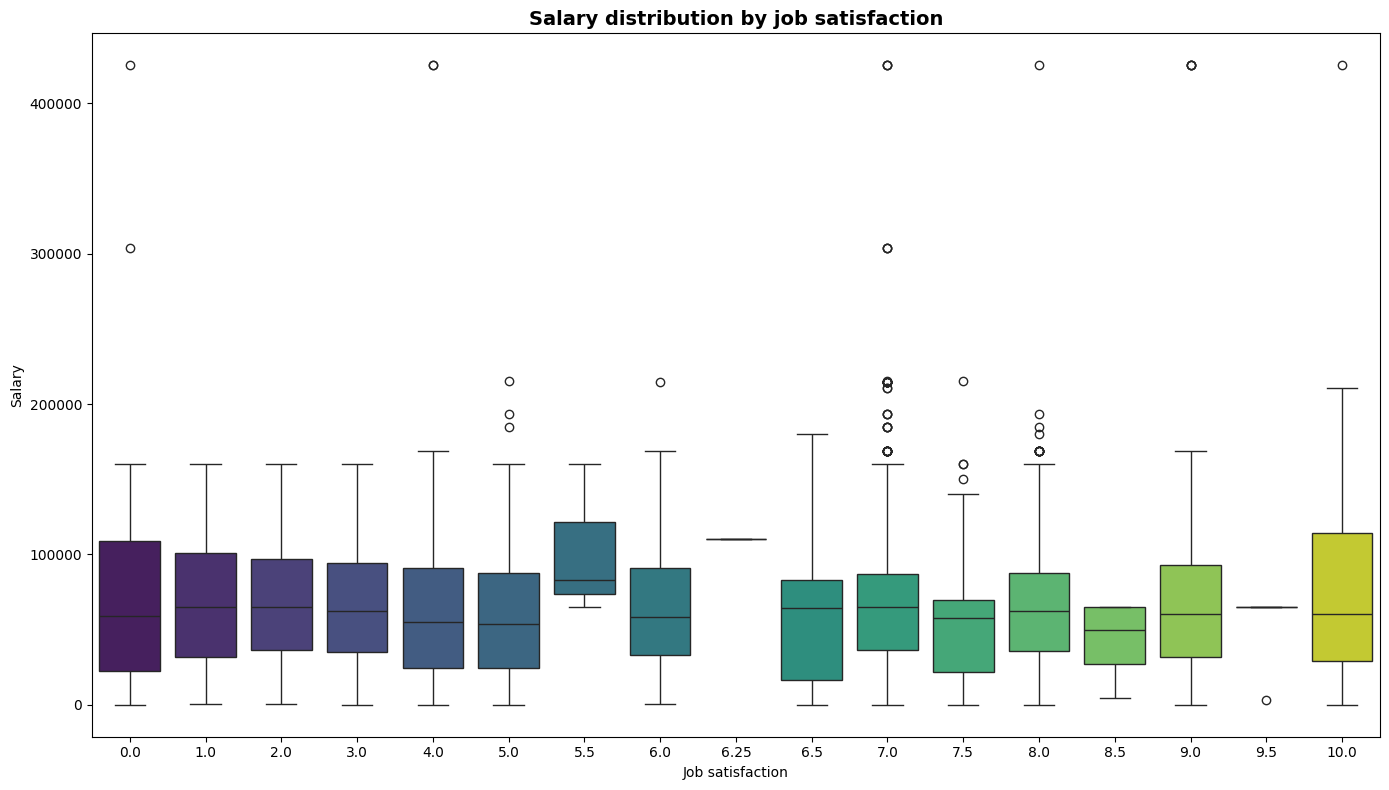

In [ ]:
query="""
select jobsat, salary_imputed from main
order by salary_imputed, jobsat
"""
df_jobsat=pd.read_sql_query(query, conn)
print(df_jobsat)

plt.figure(figsize=(14,8))
sns.boxplot(data=df_jobsat, x='JobSat', y='Salary_imputed', palette='viridis')
plt.title('Salary distribution by job satisfaction', fontsize=14, fontweight='bold')
plt.xlabel('Job satisfaction')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()


                                             DevType  Salary_imputed
0                              Developer, full-stack        425272.0
1      Developer, desktop or enterprise applications        425272.0
2                              Developer, full-stack        425272.0
3                               Developer, front-end        425272.0
4                                            Student        425272.0
...                                              ...             ...
39120                            Developer, back-end             3.0
39121                          Developer, full-stack             3.0
39122  Developer, desktop or enterprise applications             3.0
39123                          Developer, full-stack             1.0
39124                          Developer, full-stack             1.0

[39125 rows x 2 columns]


C:\Users\Administrator\AppData\Local\Temp\ipykernel_17916\486644945.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df_toproles, x='DevType', y='Salary_imputed', palette="Set1")


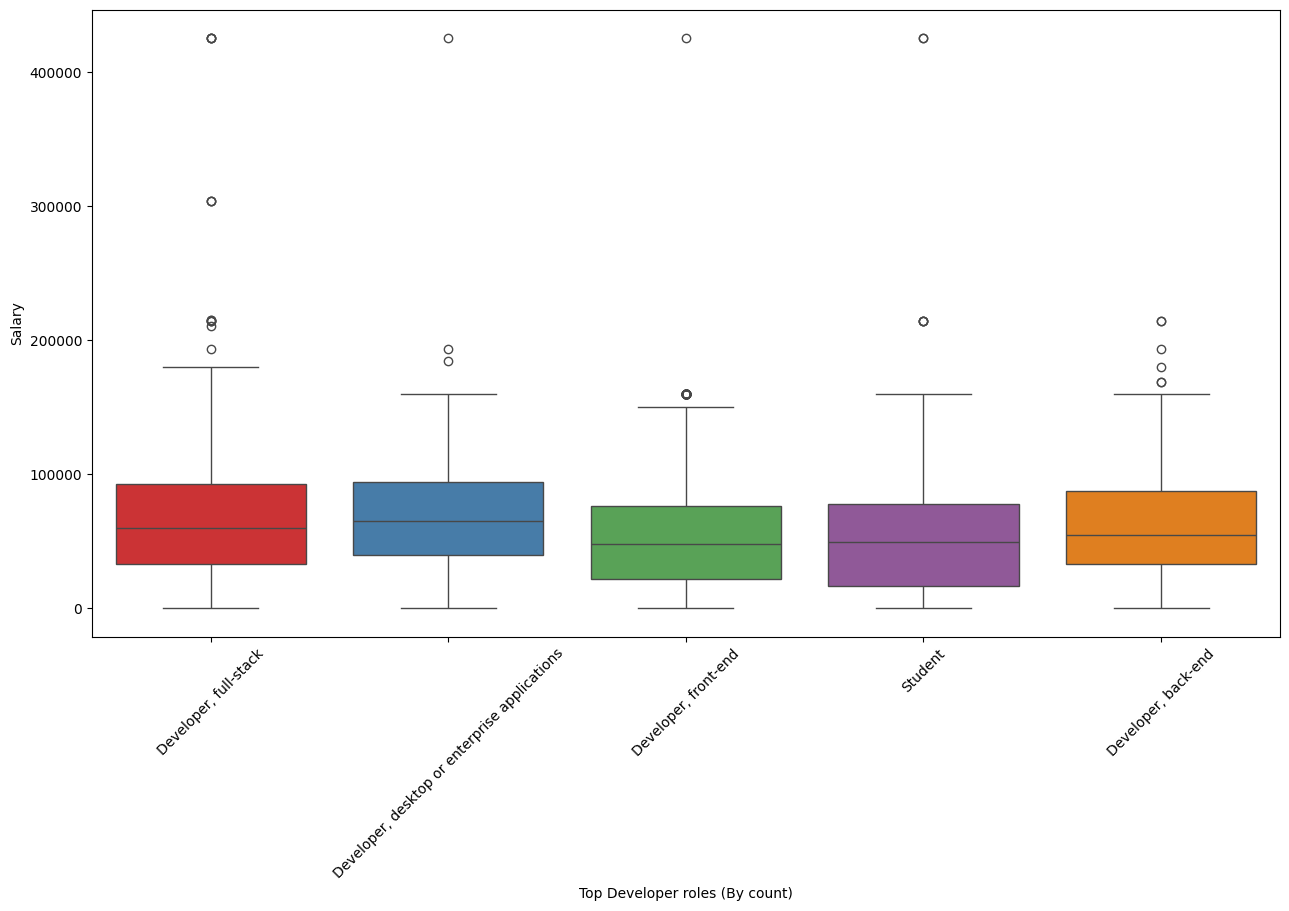

In [ ]:
query = """
SELECT DevType, Salary_imputed
FROM main
WHERE DevType IN (
    SELECT DevType              -- ← Only 1 column!
    FROM main 
    WHERE DevType IS NOT NULL
    GROUP BY DevType
    ORDER BY COUNT(*) DESC 
    LIMIT 5
)
ORDER BY Salary_imputed DESC
"""

df_toproles=pd.read_sql_query(query, conn)
print(df_toproles)

plt.figure(figsize=(13,7))
sns.boxplot(df_toproles, x='DevType', y='Salary_imputed', palette="Set1")
plt.tight_layout()
plt.xlabel('Top Developer roles (By count)')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()

      Country  Salary_imputed
0         USA        160000.0
1         USA        160000.0
2         USA        160000.0
3         USA        160000.0
4         USA        160000.0
...       ...             ...
29999   India          4091.5
30000   India          4091.5
30001   India          4091.5
30002   India          4091.5
30003   India          4091.5

[30004 rows x 2 columns]


C:\Users\Administrator\AppData\Local\Temp\ipykernel_17916\3360133120.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df_country, x='Country', y='Salary_imputed', palette='viridis')


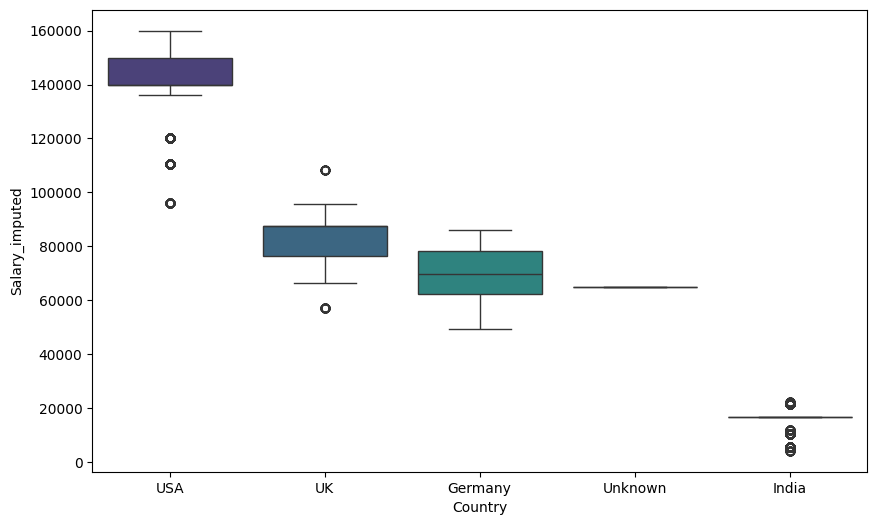

In [ ]:
query="""
select Country, Salary_imputed from main
where Country in (
    Select country from main
    group by country
    order by count(*) desc 
    limit 5
    )
order by salary_imputed desc
"""
df_country=pd.read_sql_query(query, conn)
print(df_country)

plt.figure(figsize=(10, 6))
sns.boxplot(df_country, x='Country', y='Salary_imputed', palette='viridis')
plt.show()

In [ ]:
#query="""
#SELECT 
 #   Country,
  #  COUNT(*) AS row_count,
  #  COUNT(DISTINCT Salary_imputed) AS distinct_salaries,
  #  MIN(Salary_imputed) AS min_salary,
  #  MAX(Salary_imputed) AS max_salary
#FROM main
#WHERE Country IN (
 #   SELECT country 
    #FROM main
    #GROUP BY country
   # ORDER BY COUNT(*) DESC 
   # LIMIT 5
#)
#GROUP BY Country
#ORDER BY row_count DESC;
#"""
#df_new=pd.read_sql_query(query, conn)
#print(df_new)

In [ ]:
query="""
SELECT 
   Country,
  COUNT(*) AS row_count,
  COUNT(DISTINCT Salary_imputed) AS distinct_salaries,
   MIN(Salary_imputed) AS min_salary,
  MAX(Salary_imputed) AS max_salary
FROM main
WHERE Country IN (
    SELECT country 
    FROM main
    GROUP BY country
    ORDER BY COUNT(*) DESC 
   LIMIT 5
)
GROUP BY Country
ORDER BY row_count DESC;
"""
df_new=pd.read_sql_query(query, conn)
print(df_new)

   Country  row_count  distinct_salaries  min_salary  max_salary
0      USA      11095                  7     96000.0    160000.0
1  Unknown       6507                  1     65000.0     65000.0
2  Germany       4947                  6     49407.0     85925.0
3    India       4231                  7      4091.5     22013.0
4       UK       3224                  7     57109.0    108280.0


In [ ]:
query="""
select Employment, salary_imputed from main
group by employment
"""
df_jobtype=pd.read_sql_query(query, conn)
print(df_jobtype)

                                            Employment  Salary_imputed
0                                         Employed, FT        150000.0
1                            Employed, FT;Employed, PT          7034.0
2                   Employed, FT;IC, freelancer, or SE         29621.0
3      Employed, FT;IC, freelancer, or SE;Employed, PT          9794.5
4    Employed, FT;IC, freelancer, or SE;Employed, P...        150000.0
..                                                 ...             ...
105               Student, FT;Student, PT;Employed, PT         16635.5
106                    Student, FT;Student, PT;Retired          9384.0
107                                        Student, PT         15130.0
108                           Student, PT;Employed, PT         49407.0
109                                Student, PT;Retired         43519.5

[110 rows x 2 columns]


In [2]:
conn.close()